In [6]:
#Veteran Suicide State wise comparison
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 



In [ ]:
import plotly.plotly as py
import plotly
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [7]:
vhafile = "VHA_Center.csv"
file2 = '50_usstates_data.csv'
file = "veteran_suicides_2005-2011.csv"

In [8]:
#reading vet data from csv  
state_df = pd.read_csv(file2)
vet_df = pd.read_csv(file)

#deleting the unnamed column -cleaning 
del vet_df['Unnamed: 0']
vet_df.shape

(50, 43)

In [9]:
#group by state  
#calculating the mean of vet suicides data for years 2005 to 2011 statewise 
#Suiciderate calculation

vet_suicideratelist = []
nonvet_suicideratelist = []
statelist= []
vetdf = vet_df.set_index('state')

for index,row in vetdf.iterrows():
    
    #Overall population from 2005 to 2011 satewise
    overallpop = (row[1] + row[7]+ row[13] + row[19] +row[25] + row[31] + row[37])
    vetpop = (row[0] + row[6] + row[12] + row[18] + row[24] + row[30] + row[36])
    nonvetpop = (overallpop - vetpop)
    
    overall_suicide = (row[4] + row[10]+ row[16]+ row[22]+row[28]+row[34]+row[40])
    vet_suicide = (row[3] + row[9]+ row[15]+ row[21]+row[27]+row[33]+row[39])
    nonvet_suicide = (overall_suicide - vet_suicide)
    
    vet_suiciderate = round((vet_suicide / vetpop) *100000, 2)
    nonvet_suiciderate = round((nonvet_suicide / nonvetpop) *100000,2)
    
    vet_suicideratelist.append(vet_suiciderate)
    nonvet_suicideratelist.append(nonvet_suiciderate)
    statelist.append(index)

#list to dataframe
new_df = pd.DataFrame({'statelist':statelist, 'vet_suicideratelist':vet_suicideratelist, 'nonvet_suicideratelist' : nonvet_suicideratelist})

#create new df 
new_df = new_df[['statelist', 'vet_suicideratelist','nonvet_suicideratelist']]

#sort based on value 
new_df1 = new_df.sort_values(by=['vet_suicideratelist'], ascending=False)
new_df1 = new_df1.reset_index(drop=True)
#new_df.set_index('vet_suicideratelist')


In [10]:
vet_suicideratelist

[37.11,
 41.1,
 42.55,
 36.38,
 33.73,
 44.27,
 18.95,
 21.99,
 36.78,
 26.58,
 20.06,
 49.31,
 25.45,
 28.97,
 29.21,
 37.19,
 22.0,
 31.17,
 30.97,
 20.14,
 12.17,
 31.53,
 27.74,
 35.73,
 35.35,
 55.8,
 13.83,
 50.47,
 29.45,
 17.47,
 47.38,
 21.07,
 30.46,
 37.85,
 28.55,
 38.39,
 43.46,
 30.25,
 23.09,
 32.63,
 35.31,
 35.18,
 30.2,
 43.85,
 26.78,
 25.86,
 36.84,
 39.42,
 32.92,
 47.04]

/Users/ucidataanalytics/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


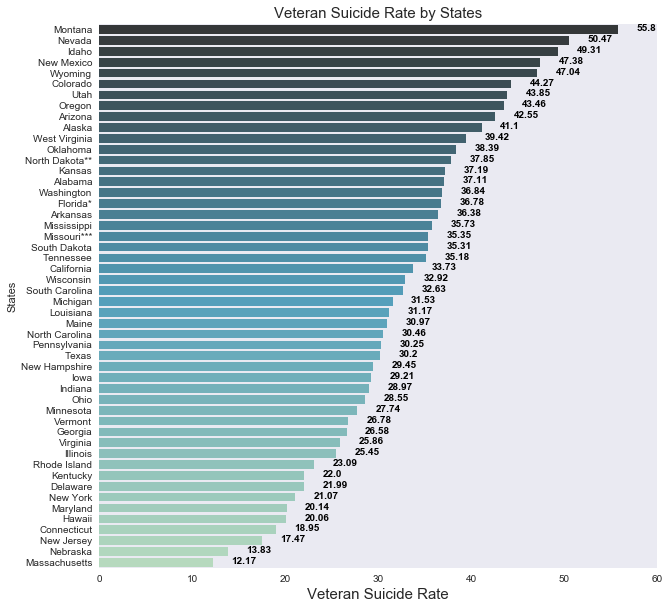

In [11]:
#graph plot State by state comparison of VETERAN suicide
fontsize = 15
sns.set(style="dark")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# xposition and y position data 
y_pos = new_df1['statelist']
x_pos =new_df1['vet_suicideratelist']

#setting the colors
sns.set_color_codes("pastel")
#color = ["#DF0101", "#B40404", "#DF3A01", "#FF8000", "#FAAC58"]
sns.barplot(x_pos, y_pos,
            label="Total", palette="GnBu_d")

plt.xlim(0,60,5)
# Plot the crashes where alcohol was involved
for i, v in enumerate(x_pos):
    plt.text(v + 2, i + .15, str(v), color='black', fontweight='bold', fontsize = 10)

# Add a legend and informative axis label
plt.title("Veteran Suicide Rate by States",fontsize = fontsize)
plt.xlabel("Veteran Suicide Rate", fontsize= fontsize)
plt.ylabel("States")
sns.despine(left=True, bottom=True)
plt.savefig("Veteran_Sucide_Rate")
plt.show() 

In [ ]:
#sort based on value 
new_df2 = new_df[['statelist','nonvet_suicideratelist', 'vet_suicideratelist']]
new_df2 = new_df2.sort_values(by=['nonvet_suicideratelist'], ascending=False)


In [ ]:
#graph plot State by state comparison of Non VETERAN Suicide 

sns.set(style="dark")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# xposition and y position data 
y_pos = new_df2['statelist']
x_pos =new_df2['nonvet_suicideratelist']


#new_df.set_index('vet_suicideratelist')
#setting the colors
sns.set_color_codes("pastel")
#color = ["#DF0101", "#B40404", "#DF3A01", "#FF8000", "#FAAC58"]
sns.barplot(x_pos, y_pos,
            label="Total", palette="GnBu_d")

plt.xlim(0,32,5)
# Plot the crashes where alcohol was involved
for i, v in enumerate(x_pos):
    plt.text(v + 2, i + .15, str(v), color='black', fontweight='bold', fontsize = 8 )

# Add a legend and informative axis label
plt.title("Non Veteran Suicide Rate State Wise Comparison",fontsize = 15)
plt.xlabel("Veteran Suicide Rate")
plt.ylabel("States")
sns.despine(left=True, bottom=True)
plt.savefig("non_Veteran_Sucide_Rate")
plt.show() 

In [ ]:
vh_df = pd.read_csv(vhafile,  encoding = "ISO-8859-1")


In [ ]:
#Merge the csvs and group by the VHA Centers 
merge_df = pd.merge(state_df, vh_df, how = 'outer', on='state abbreviation')

vhacountdf = merge_df.groupby(['state']).count()
vhacount_df = vhacountdf.reset_index()
vhacount_df.columns
#create new df 
vhasort_df = vhacount_df.sort_values(by= ['Facility'], ascending= False)
vhasort_df = vhasort_df.reset_index(drop= True)

In [ ]:
#graph plot State by state comparison of VETERAN suicide
fontsize = 15
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# xposition and y position data 
y_pos = vhasort_df['state']
x_pos =vhasort_df['Facility']

#setting the colors
sns.set_color_codes("pastel")
#color = ["#DF0101", "#B40404", "#DF3A01", "#FF8000", "#FAAC58"]
sns.barplot(x_pos, y_pos,
            label="Total", palette="Reds")

plt.xlim(0,17,5)
# Plot the crashes where alcohol was involved
for i, v in enumerate(x_pos):
    plt.text(v + .5, i , str(v), color='black', fontweight='bold', fontsize = 10)

# Add a legend and informative axis label
plt.title("VHA Centers by States",fontsize = fontsize)
plt.xlabel("VHA Center ", fontsize= fontsize)
plt.ylabel("States")
sns.despine(left=True, bottom=True)
plt.savefig("VHA_center_states")
plt.show() 

In [ ]:
merge_df3 = pd.merge(vet_df, vhacount_df, how = 'outer', on='state')

merge_df4 = merge_df3.set_index('state')
merge_df4.shape

In [ ]:
vet_suicideratelist_ = []
vetpopulationlist_ = []
statelist_= []
state_c_ = []
vhcenterslist_ = []
for index,row in merge_df4.iterrows():
    #Overall population from 2005 to 2011 satewise
    overallpop = (row[1] + row[7]+ row[13] + row[19] +row[25] + row[31] + row[37])
    vetpop = (row[0] + row[6] + row[12] + row[18] + row[24] + row[30] + row[36])
    
    vet_suicide = (row[3] + row[9]+ row[15]+ row[21]+row[27]+row[33]+row[39])
    
    vet_suiciderate = round((vet_suicide / vetpop) *100000, 2)
    facilityc = row[48]
    
    vetpopulationlist_.append(vetpop)
    vet_suicideratelist_.append(vet_suiciderate)
    statelist_.append(index)
    vhcenterslist_.append(facilityc)
    
#print(vet_suicideratelist_)
#print(vetpopulationlist_)
#print(statelist_)
#print(len(vhcenterslist_))
#list to dataframe
#order new df 
newdf = pd.DataFrame({'statelist_':statelist_, 'vet_suicideratelist_':vet_suicideratelist_, 'vetpopulationlist_' : vetpopulationlist_, 'vha centerslist_': vhcenterslist_, 'st_code' : state_df['state abbreviation']})

newdf = newdf[['st_code','statelist_', 'vet_suicideratelist_','vetpopulationlist_','vha centerslist_']]


In [ ]:
for col in newdf.columns:
    newdf[col] = newdf[col].astype(str)

newdf.columns    

In [ ]:
scl = [[0.0, 'rgb(204, 255, 102)'],[0.4, 'rgb(179, 255, 26)'],\
            [0.6, 'rgb(136, 204, 0)'],[0.8, 'rgb(85, 128, 0)'],[1.0, 'rgb(0, 128, 0)']]
#[0.2, 'rgb(102, 255, 102)'],

In [ ]:
newdf['text'] = newdf['statelist_'] + ':' + newdf['st_code'] + '<br>' +\
     'Veterans population ' + newdf['vetpopulationlist_'] + '<br>' +\
     'Suiciderate ' + newdf['vet_suicideratelist_'] + '<br>' + 'VHA Count ' + newdf['vha centerslist_']

In [ ]:
data = [dict(
        type = 'choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = newdf['st_code'],
        z= newdf['vet_suicideratelist_'],
        locationmode = 'USA-states',
        text = newdf['text'],
        marker = dict(
            line = dict(
                color = 'rgb(51,51,51)',
                width = 2
            )),
        colorbar = dict(
                title = "Veteran Suicide <br>State Comparison",
                titleside = 'left',
                tickmode = 'array',
                tickvals = [55,35,15],
                ticktext = ['High','Medium','Less'],
                ticks = 'outside'
                )
            )]

In [ ]:
layout = dict(
        title = 'Veteran Suicide State wise comparison',
        geo = dict(
            scope = 'usa',
            projection=dict(type = 'albers usa'),
            showlakes = True,
            lakecolor = 'rgb(0, 138, 230)'),
            )
        

In [ ]:
fig = dict(data= data, layout = layout)
choromap = go.Figure(data = data,layout = layout)
plotly.offline.plot(choromap)